In [44]:
#Die ganzen packages die für den versuch verwendet werden

%config InlineBackend.figure_format = 'svg' #macht plot/bilder mit unendlich hoher auflösung wie eine PDF / ABER brauch >>>sudo apt install inkscape

import numpy as np #numpy ist ein package mit allen mathematischen ausdrücken/funktionen/operationen/etc. 
from uncertainties import ufloat #Uncertainties ist für das automatische berrechnen von unsicherheiten
from uncertainties.umath import * #Importieren von rechnen mit uncertainties (addition/multiplikation/etc.)
from uncertainties import unumpy as unp #kann arrays von unsicherheiten verstehen (also eine liste, statt jede zahl einzeln einzutippen)
from IPython.display import Latex, HTML, Math, display # Um ergebnisse schöner anzuzeigen. display() "ersetzt" quasi print(), und lässt latex fromatierung zu
import matplotlib.pyplot as plt #Damit kann man graphen plotten



#funktion für mittwlert mit fehler defnieren (um später ein uarray mit unsicherheiten direkt zu einem mittelwert zu machen)
def mean(values):
    nom = unp.nominal_values(values)
    std_mean = np.std(nom, ddof=1) / np.sqrt(len(nom))
    return ufloat(np.mean(nom), std_mean)

# Eigenschaften von Flüssigkeiten

## Bestimmung der Viskosität in Temperaturabhängigkeit

Es soll die Viskosität von destilliertem Wasser bei verschiedenen Temperaturen bestimmt und in Abhängigkeit dieser gesetzt werden. Des Weiteren soll auch die Oberflächenspannung von destilliertem Wasser bestimmt werden. 


### Grundlagen

Die Viskosität einer Flüssigkeit zeigt sich experimentell in dem Kraftaufwand zum Verschieben einer Platte parallel zu einer anderen, zwischen denen sich eben jene Flüssigkeit befindet. Die tatsächliche Berechnung der Viskosität η ergibt sich dabei aus dem Hagen-Poiseuille’schen Gesetz, wobei diese aus den geometrischen Abmessungen der durchflossenen Röhre, der Durchflussrate selbst und der Druckdifferenz berechnet werden kann.

$$\frac{\Delta V}{\Delta t} = \frac{\pi r^4 \Delta p}{8 \eta l}$$


### Durchführung und Versuchsaufbau

Viskositätsbestimmung: Diese erfolgt hier mit einem Kapillarviskosimeter, wobei im Wesentlichen jene Zeit gemessen wird, die Wasser benötigt, um eine gewisse vertikale Höhendifferenz zu überwinden. Umso größer die nötige Zeit, desto höher die Viskosität der Flüssigkeit. Die geometrischen Abmessungen sind bereits in der Gerätekonstante a eingerechnet, sodass sich die Viskosität in Abhängigkeit der Dichte, der Höhendifferenz, der benötigten Zeit und der Gerätekonstante berechnen lässt: 
$$\eta = a \cdot \overline{h} \cdot \rho \cdot \Delta t $$

Dichtebestimmung: Diese erfolgt mit dem Aräometer nach dem Archimedischen Prinzip. Dabei sinkt das Messgerät bis zu einer Tiefe ein, wo es schwimmt. Hier ist die Gewichtskraft der verdrängten Flüssigkeit gleich der Auftriebskraft, wobei sich aus der Einsinktiefe die Dichte der Flüssigkeit bestimmen lässt.

Mittels beider Verfahren lässt sich so die Viskosität experimentell bestimmen. Für diesen Versuchsaufbau soll zudem die Temperaturabhängigkeit der Viskosität gezeigt werden, welche sich aus einer Messreihe bei Zimmertemperatur und Einzelmessungen bei rund 35°C und 50°C ergibt. 


#### Verwendete Geräte


* Aräometer: 0,001 g/cm^3 (Skalen-Unsicherheit)
* Lineal: 1 mm (Skalen-Unsicherheit)
* Stoppuhr: 0,2s (menschliche Reaktionszeit)
* Viskosimeters: 1,02*10^(-8) m/s^2

### Ergebnisse


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

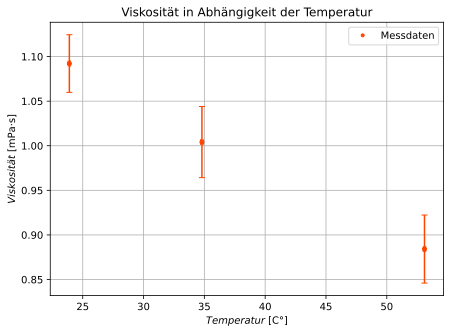

In [45]:


unsicherheit_dichte = 0.001                             #g/cm^3  
dichte_werte = ufloat(0.997, unsicherheit_dichte)       #g/cm^3
dichte = dichte_werte * 1000                            #g/cm^3 --> kg/m^3

unsicherheit_höhe = 0.2             #cm (unsicherheit Lineal?)
h_1 = ufloat(23.2, unsicherheit_höhe) #cm
h_2 = ufloat(18.2, unsicherheit_höhe) #cm

h = ((h_1+h_2)/2) /100 #cm #/100 wegen cm-->m

unsicherheit_uhr = 0.2 #s --> 200ms sind menschliche Reaktionszeit
time = unp.uarray([10.26 , 10.40 , 10.37 , 10.42 , 10.31 , 10.40 , 10.47 , 10.33 , 10.48 , 10.33], unsicherheit_uhr) #s

a = ufloat(5.1*(10**(-7)), 1.02*10**(-8)) #m/s^2  

visko_raum = a * time * h * dichte *1000 #Pa --> mPa


#Temperaturabhängigkeit

#bei ~50 grad
unsicherheit_höhe = 0.2                #cm (unsicherheit Linael?)
h_1_50 = ufloat(23.2, unsicherheit_höhe) #cm
h_2_50 = ufloat(18.2, unsicherheit_höhe) #cm

h_50 = ((h_1_50+h_2_50)/2) /100 #cm --> m

unsicherheit_uhr = 0.2 #s
t_50 = ufloat(8.40, unsicherheit_uhr) #s

visko_50 = a * t_50 * h_50 * dichte *1000 #Pa --> mPa


#bei ~35 grad
unsicherheit_höhe = 0.2                #cm (usicherheit Lineal?)
h_1_35 = ufloat(23.2, unsicherheit_höhe) #cm
h_2_35 = ufloat(18.2, unsicherheit_höhe) #cm

h_35 = ((h_1_35+h_2_35)/2) / 100 #cm --> m 

unsicherheit_uhr = 0.2 #s
t_35 = ufloat(9.54, unsicherheit_uhr) #s

visko_35 = a * t_35 * h_35 * dichte *1000 #Pa --> mPa


# Unischerheiten der einzelnen messungen im nachhinein noch anpassen (in diesem fall + 0.01)
Visko_raum = ufloat(unp.nominal_values(mean(visko_raum)), unp.std_devs(mean(visko_raum)) + 0.03) 

Visko_35 = ufloat(unp.nominal_values(visko_35), unp.std_devs(visko_35) + 0.01) 

Visko_50 = ufloat(unp.nominal_values(visko_50), unp.std_devs(visko_50) + 0.01) 

display(Latex(rf"$$\bar{{\eta}}_{{23.9}}={Visko_raum:.3f}~\mathrm{{mPas}}$$"))
display(Latex(rf"$$\eta_{{34.8}}={Visko_35:.2f}~\mathrm{{mPas}}$$"))
display(Latex(rf"$$\eta_{{53.1}}={Visko_50:.2f}~\mathrm{{mPas}}$$"))


#Graph
T = list([23.9, 34.8, 53.1])                                                 #Liste an Temperaturen (für x-achse)
V = unp.nominal_values(list([Visko_raum ,Visko_35, Visko_50]))          #Liste an Vsiko-werten (für y-achse)
V_std = unp.std_devs(list([Visko_raum ,Visko_35, Visko_50]))            #Die unsicherheiten der jeweiligen Visko werte (Für Fehlerbalken)


plt.plot(T, V, 'o', markersize=3, label="Messdaten", color="orangered")                     #T = x-achse, V = y-achse, 'o' als punkte darstellen (z.b. '-' für liniendarstellung, markersize is punktgröße)
plt.xlabel("$Temperatur $ [C°]")                                        #Beschriftung der x-achse
plt.ylabel(r"$Viskosität $ [mPa$\cdot$s]")                              #Beschriftung der y-achse
plt.title("Viskosität in Abhängigkeit der Temperatur")                  #Titel des Graphen
plt.errorbar(T, V, fmt='o',yerr=V_std, xerr=0.1, capsize=3, markersize=4, color="orangered")         #Darstellung der Fehlerbalken 
#T = x-achse, V = y-achse, fmt='o' als punkte darstellen, y_err ist liste für die jeweiligen fehlerbalken (also deren höhe in y), capsize sind die striche on top und bottom, markersize is punktgröße





plt.grid()                                                              #zeichnet das grid im hintergrund
plt.tight_layout()                                                      #skaliert die achsen so dass es in den graphen passt
plt.legend()                                                            #erstellt eine legende für labels
plt.show()                                                              #zeigt den plot an "muss" bei jedem plot ganz am ende stehen


### Diskussion

Grundsätzlich zeigt sich, dass die Viskosität mit zunehmender Temperatur abnimmt. Dies bestätigt die Theorie. Nicht beachtet wurde bei diesem Versuch, dass Wasser bei unterschiedlichen Temperaturen eine unterschiedliche Dichte aufweist. Es wurde nur am Anfang des Experiments die Dichte des Wassers bei Zimmertemperatur erhoben. Eine weitere Fehlerquelle ist, dass das Wasser in der Kapillare sehr viel schneller abkühlt und somit mit gemessene Temperatur nicht mehr akkurat war.

## Oberflächenspannung nach der Abreißmethode

Mithilfe der Abreißmethode soll die Oberflächenspannung von destilliertem Wasser ermittelt werden.


### Grundlagen

Moleküle einer Flüssigkeit stehen in ständiger Wechselwirkung untereinander. Jenachdem welche Kraft von außen wirkt, sind diese anziehend oder abstoßend. Dadurch stellt sich ein annähernd konstaner Abstand zwischen den Molekülen ein. Im Inneren heben sich alle Kräfte der Nachbarmolekülke auf. An der Oberfläche jedoch besitzen die Moleküle nur zur Wasserseite hin Nachbarmoleküle, wodurch sie sofort zurückgezogen werden, wenn sie sich ein wenig aus der Oberfläche hinaus bewegen. Die Energie, die pro Fläche aufgewendet werden muss, um Moleküle aus der Flüssigkeit zu entfernen, wird Oberflächenspannung genannt:

$$\sigma=\frac{\Delta E}{\Delta A}$$

Die Abreißmethode wird dazu verwendent, die Oberflächenspannung experimentell zu ermitteln. Dabei wird geschaut bei welcher Kraft F, die auf die Flüssigkeitslamelle angewendet wird, diese reißt.
Es gilt dabei:

$\Delta E={F}\cdot{\Delta s}$

Die Oberflächenänderdung der Lamelle eines U-förmigen Draht ist gegeben durch:

${\Delta A}=2\cdot b\cdot{\Delta s}$

Durch das Einfügen dieser beiden Formeln, in die Formel für die Oberflächenspannung erhält man:

\begin{gather}
\sigma = \frac {F}{2 \cdot b}
\end{gather}

Im Versuch wird statt des U-förmigen Drahts ein Aluminiumring mit Durchmesser D als Lamelle verwendet. Näherungsweise wird angenommen, dass der Innenradius gleich dem Außenradius ist. Man muss die Bügellänge nun durch den Kreisumfang ersetzen und erhält dann die Formel::

\begin{gather}
\sigma = \frac {F}{2 \cdot \pi \cdot D} 
\tag{2}
\end{gather}

### Versuchsaufbau und Durchführung

Der Aluminiumring wird an einer Federwaage befestigt, die wiederum an einem Stativ befestigt ist. Die Federwaage wird dann tariert, sodass das Gewicht des Aluminiumrings den Nullpunkt anzeigt. Das mit destilliertem Wasser gefüllte Becherglas wird nun mihilfe einer Laborhebebühne son weit angehoben, dass der Aluminiumring zur Hälfte unter Wasser ist. Die Hebebühne wird dann langsam nach unten abgesenkt, sodass sich eine Flüssigkeitslamelle bildet.Die Kraft, die die Federwaage unmittelbar vor dem Abreißen anzeigt wird notiert. Die Messung wird 10 Mal wiederholt und mit der voher beschrieben Gleichung die Obverflächenspannung $\sigma$ von Wasser und ihre Unsicherheit ausgerechnet.
 

#### Verwendete Geräte und Unsicherheiten

* Federwaage: 1 mN
* Schublehre: 2 mm

### Ergebnisse

In [ ]:
#Abreißmethode / oberflächenspannung von wasser


unsicherheit_kraft = 1      #mN
#Kraft Messungen:
F_werte = unp.uarray([18,19,18,18,19,18,19,18,18,18], unsicherheit_kraft)     #mN
#Mittelwert mit unsicherheit:
F = mean(F_werte)      #mN

#Ring durchmesser
D = ufloat(58.8, 2) / 1000      #mm --> m

sigma = F/(2*np.pi*D)

display(Latex(rf"$$\bar{{F}}=({F:2f})~\mathrm{{mN}}$$"))
display(Latex(rf"$$\sigma=({sigma:2f})~\mathrm{{\frac{{mN}}{{m}}}}$$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Diskussion

Der Literaturwert für die Oberflächenspannung von Wasser bei 20°C liegt bei 72.75 mN/m \cite{chemie}.
Dies weicht um ca. 20 mN/m vom ermittelten Wert an. Dies liegt an der Verschmutzung des Ringes durch vermehrtes Anfassen und der dadurch verursachten Ablagerung von Fette. Außerdem wurde die Temperatur des Wassers vernachlässigt.

